In [7]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas.plotting import register_matplotlib_converters

In [2]:
tickers = ("FB","AMZN","AAPL","MSFT","GOOG","^GSPC")
startDate = "2018-01-01"
endDate = "2018-12-31"

def get_yahoo_data(ticker,startDate,endDate):
    data = web.get_data_yahoo(ticker,start = startDate,end = endDate)
    print("Name: {}\nNo. of values:{}\n\n{}\n".format(ticker,len(data),data.head()))
    return data

In [3]:
facebook = get_yahoo_data(tickers[0],startDate,endDate)
amazon = get_yahoo_data(tickers[1],startDate,endDate)
apple = get_yahoo_data(tickers[2],startDate,endDate)
microsoft = get_yahoo_data(tickers[3],startDate,endDate)
google = get_yahoo_data(tickers[4],startDate,endDate)
snp500 = get_yahoo_data(tickers[5],startDate,endDate)

Name: FB
No. of values:251

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   

             Adj Close  
Date                    
2018-01-02  181.419998  
2018-01-03  184.669998  
2018-01-04  184.330002  
2018-01-05  186.850006  
2018-01-08  188.279999  

Name: AMZN
No. of values:251

                   High          Low         Open        Close   Volume  \
Date                                                                      
2018-01-02  1190.000000  1170.510010  1172.000000  1189.010010  2694500   
2018-01-03  1205.489990  1188.300049

In [4]:
def add_perchange(df):
    df["pctChange"] = df.iloc[:,5].pct_change()
    return df

def perChange_plot(df):
    plt.bar(df.index,df.iloc[:,6])
    plt.xlabel("Year-Month")
    plt.ylabel("Percent change")

In [5]:
facebook = add_perchange(facebook)
amazon = add_perchange(amazon)
apple = add_perchange(apple)
microsoft = add_perchange(microsoft)
google = add_perchange(google)
snp500 = add_perchange(snp500)
facebook.head() #Column for percentage change has been added for all

High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   

             Adj Close  pctChange  
Date                               
2018-01-02  181.419998        NaN  
2018-01-03  184.669998   0.017914  
2018-01-04  184.330002  -0.001841  
2018-01-05  186.850006   0.013671  
2018-01-08  188.279999   0.007653

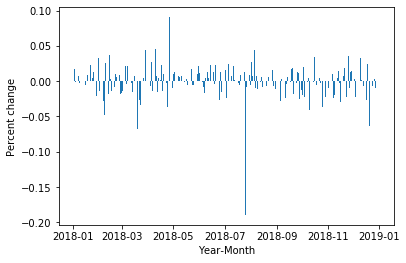

In [8]:
perChange_plot(facebook)

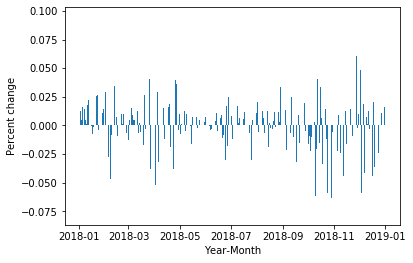

In [9]:
perChange_plot(amazon)

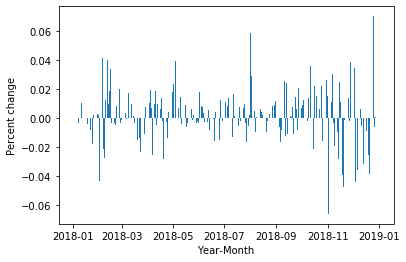

In [10]:
perChange_plot(apple)

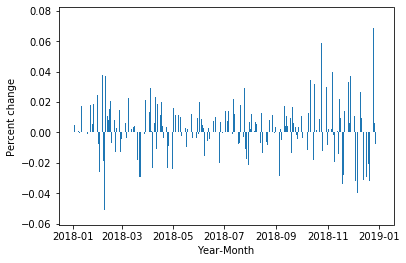

In [11]:
perChange_plot(microsoft)

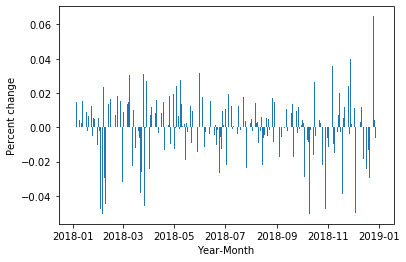

In [26]:
perChange_plot(google)perChange_plot(microsoft)

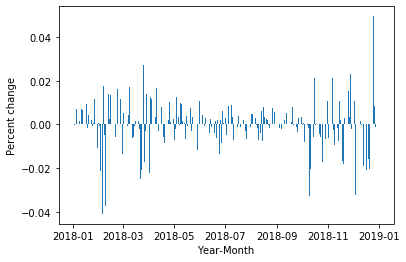

In [27]:
perChange_plot(snp500)

In [28]:
def print_info(df):
    data = df.iloc[:,6]
    print("Mean: {}\nSD: {}\nVariance: {}\nMax: {}\nMin: {}\n".format(data.mean(),
                                                                 data.std(),
                                                                 data.var(),
                                                                 data.max(),
                                                                 data.min()))


In [29]:
print_info(facebook)
print_info(amazon)
print_info(apple)
print_info(microsoft)
print_info(google)
print_info(snp500)

Mean: -0.001002520801586708
SD: 0.02390061872639461
Variance: 0.0005712395755044847
Max: 0.09061306906806821
Min: -0.1896092206582256

Mean: 0.001193726761792808
SD: 0.022722648296013837
Variance: 0.0005163187455843406
Max: 0.09445226581602428
Min: -0.07819679487096065

Mean: -0.00012910921189313338
SD: 0.01807003290857181
Variance: 0.0003265260893168682
Max: 0.07042153386670402
Min: -0.06633078625419342

Mean: 0.0008951229647759715
SD: 0.01780293655706598
Variance: 0.0003169445500549162
Max: 0.07570547001270245
Min: -0.054338121506550596

Mean: 4.5236963362146985e-05
SD: 0.01768815857481792
Variance: 0.00031287095376790475
Max: 0.06478047175046653
Min: -0.050578650096208544

Mean: -0.0002328970421437324
SD: 0.010727948921664003
Variance: 0.00011508888806583183
Max: 0.04959374278953943
Min: -0.04097922480422822



In [15]:
def fill_na(df):
    return df.fillna(df.iloc[:,6].mean(), inplace = True)

fill_na(facebook)
fill_na(amazon)
fill_na(apple)
fill_na(microsoft)
fill_na(google)
fill_na(snp500)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

R squared is: 0.33118288146365105
mean squared error is: 5.482433923727342e-05
slope coefficient is: [0.25430476]
intercept is: -9.523337033801882e-05


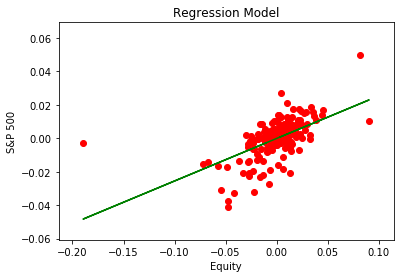

In [17]:
def reg(f,y):
    f_train, f_test, y_train, y_test = train_test_split(f,y, random_state=0)
    
    linreg = LinearRegression()
    linreg.fit(f_train, y_train)
    y_pred = linreg.predict(f_test)
    
    print("R squared is: "+str(linreg.score(f_train, y_train)))
    print("mean squared error is: "+str(metrics.mean_squared_error(y_test,y_pred)))
    print("slope coefficient is: "+str(linreg.coef_))
    print("intercept is: "+str(linreg.intercept_))
    
    plt.scatter(f_train, y_train, color = "red")
    plt.plot(f_train, linreg.predict(f_train), color = "green")
    plt.title("Regression Model")
    plt.xlabel("Equity")
    plt.ylabel("S&P 500")
    
reg( np.array( facebook.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) #FACEBOOK


R squared is: 0.6307878662843789
mean squared error is: 4.995508859737828e-05
slope coefficient is: [0.38855346]
intercept is: -0.0007054096528095609


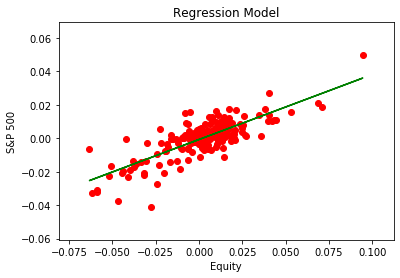

In [18]:
reg( np.array( amazon.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.6019991490716596
mean squared error is: 5.555847256487603e-05
slope coefficient is: [0.49085737]
intercept is: -0.000341881811262728


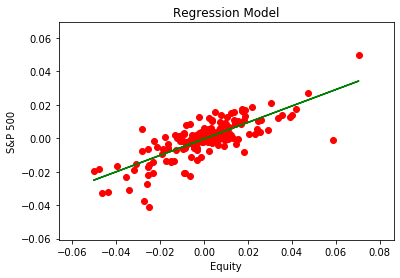

In [19]:
reg( np.array( apple.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.772986228498945
mean squared error is: 2.2307918579141047e-05
slope coefficient is: [0.52162544]
intercept is: -0.000865817581903342


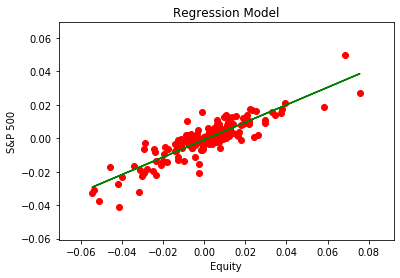

In [20]:
reg( np.array( microsoft.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

R squared is: 0.68086235438018
mean squared error is: 2.082671792509325e-05
slope coefficient is: [0.50372039]
intercept is: -0.0005176484247949773


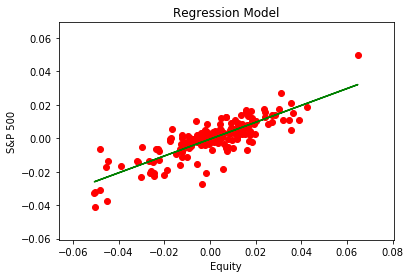

In [21]:
reg( np.array( google.iloc[:,6] ).reshape(-1,1),snp500.iloc[:,6] ) 

In [22]:
tickers8 = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "^GSPC"]
multpl_stocks = web.get_data_yahoo(tickers8,
start = "2018-01-01",
end = "2018-12-31")
multpl_stocks.head()

Attributes   Adj Close                                                    \
Symbols           AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                       
2018-01-02  167.199890  1189.010010  181.419998  1065.000000  201.070007   
2018-01-03  167.170776  1204.199951  184.669998  1082.479980  205.050003   
2018-01-04  167.947266  1209.589966  184.330002  1086.400024  205.630005   
2018-01-05  169.859406  1229.140015  186.850006  1102.229980  209.990005   
2018-01-08  169.228500  1246.869995  188.279999  1106.939941  212.050003   

Attributes                    Close                                        \
Symbols           ^GSPC        AAPL         AMZN          FB         GOOG   
Date                                                                        
2018-01-02  2695.810059  172.259995  1189.010010  181.419998  1065.000000   
2018-01-03  2713.060059  172.229996  1204.199951  184.669998  1082.479980   
2018-01-04  2723.989990  173.029999  1209.589966  184.330002  1086.400024   
2018-01-05  2743.149902  175.000000  1229.140015  186.850006  1102.229980   
2018-01-08  2747.709961  174.350006  1246.869995  188.279999  1106.939941   

Attributes  ...        Open                                            Volume  \
Symbols     ...          FB         GOOG        NFLX        ^GSPC        AAPL   
Date        ...                                                                 
2018-01-02  ...  177.679993  1048.339966  196.100006  2683.729980  25555900.0   
2018-01-03  ...  181.880005  1064.310059  202.050003  2697.850098  29517900.0   
2018-01-04  ...  184.899994  1088.000000  206.199997  2719.310059  22434600.0   
2018-01-05  ...  185.589996  1094.000000  207.250000  2731.330078  23660000.0   
2018-01-08  ...  187.199997  1102.229980  210.020004  2742.669922  20567800.0   

Attributes                                                              
Symbols          AMZN          FB       GOOG        NFLX         ^GSPC  
Date                                                                    
2018-01-02  2694500.0  18151900.0  1237600.0  10966900.0  3.367250e+09  
2018-01-03  3108800.0  16886600.0  1430200.0   8591400.0  3.538660e+09  
2018-01-04  3022100.0  13880900.0  1004600.0   6029600.0  3.695260e+09  
2018-01-05  3544700.0  13574500.0  1279100.0   7033200.0  3.236620e+09  
2018-01-08  4279500.0  17994700.0  1047600.0   5580200.0  3.242650e+09  

[5 rows x 36 columns]

In [23]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_daily_returns.head()

Symbols         AAPL      AMZN        FB      GOOG      NFLX     ^GSPC
Date                                                                  
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.017914  0.016413  0.019794  0.006399
2018-01-04  0.004645  0.004476 -0.001841  0.003621  0.002829  0.004029
2018-01-05  0.011385  0.016163  0.013671  0.014571  0.021203  0.007034
2018-01-08 -0.003714  0.014425  0.007653  0.004273  0.009810  0.001662

In [24]:
multpl_stock_daily_returns.corr()

Symbols      AAPL      AMZN        FB      GOOG      NFLX     ^GSPC
Symbols                                                            
AAPL     1.000000  0.660381  0.444105  0.680853  0.547638  0.744693
AMZN     0.660381  1.000000  0.578176  0.750268  0.730339  0.766155
FB       0.444105  0.578176  1.000000  0.622293  0.482774  0.569408
GOOG     0.680853  0.750268  0.622293  1.000000  0.647231  0.830517
NFLX     0.547638  0.730339  0.482774  0.647231  1.000000  0.681404
^GSPC    0.744693  0.766155  0.569408  0.830517  0.681404  1.000000

In [25]:
#GOOGLE is the most correlated with the S&P500 and FACEBOOK is the least correlated with S&P500